In [80]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

import sklearn

In [81]:
sklearn.__version__

'0.23.2'

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [82]:
df=pandas.read_csv("Dataframe_melb.csv")
df
#hay que realizar el one hot encoding solo para las variables numericas ya que las variables categoricas
#ya fueron realizada dicha transformacion en el entregable 1

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,zipcode,airbnb_record_count,...,Suburb_Wheelers Hill,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Yallambie,Suburb_Yarraville,Suburb_others,Type_t,Type_u
0,0.25,0.474490,0.052743,0.068577,0.000000,0.25,0.000466,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.323129,0.052743,0.068577,0.000000,0.00,0.000360,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.469388,0.052743,0.068577,0.333333,0.00,0.000309,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.50,0.260204,0.052743,0.068577,0.333333,0.25,0.000217,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.75,0.515306,0.052743,0.068577,0.000000,0.50,0.000277,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.50,0.169048,0.348101,0.050154,0.333333,0.50,0.000591,0.103967,0.050154,0.005942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13077,0.75,0.394558,0.352321,0.153531,0.333333,0.50,0.001506,0.333769,0.153531,0.055853,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13078,0.50,0.321769,0.143460,0.016377,0.333333,0.50,0.000769,0.286482,0.016377,0.021687,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13079,0.50,0.369048,0.143460,0.016377,0.333333,1.00,0.001007,0.286482,0.016377,0.021687,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df.columns[0:11]
#Visualizo las variables numericas del df

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'zipcode', 'airbnb_record_count',
       'airbnb_price_day_mean'],
      dtype='object')

In [84]:
df['Price'].nunique()
#observo los valores unicos de price

2059

In [85]:
#utilizo solo 100 valores de price asi no se hace muy extensa la matriz
df['Price'].round(2).nunique()

100

In [86]:
df[['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'zipcode', 'airbnb_record_count',
       'airbnb_price_day_mean']].round(2).nunique().sum()
#agrego solo 408 columnas asi no se hace muy extensa la matriz

408

In [87]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
one_hot_array=encoder.fit_transform(df[['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'zipcode', 'airbnb_record_count',
       'airbnb_price_day_mean']].round(2))
#realizamos el one hot encoder a las variables numericas
one_hot_array.shape

(13081, 408)

In [88]:
col_names=encoder.get_feature_names(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'zipcode', 'airbnb_record_count',
       'airbnb_price_day_mean'])
#le agregamos los nombres de las columnas correspondientes

In [89]:
one_hot_df=pandas.DataFrame(one_hot_array,columns=col_names)
one_hot_df
#pasamos a data frame el array del one hot encoder

,Rooms_0.0,Rooms_0.25,Rooms_0.5,Rooms_0.75,Rooms_1.0,Price_0.0,Price_0.02,Price_0.03,Price_0.04,Price_0.05,...,airbnb_price_day_mean_0.32,airbnb_price_day_mean_0.33,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13077,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13078,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13079,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
df_unique = pandas.concat([df,one_hot_df],axis=1)
df_unique=df_unique.drop(["Rooms"],axis=1)
df_unique=df_unique.drop(["Price"],axis=1)
df_unique=df_unique.drop(["Distance"],axis=1)
df_unique=df_unique.drop(["Postcode"],axis=1)
df_unique=df_unique.drop(["Bathroom"],axis=1)
df_unique=df_unique.drop(["Car"],axis=1)
df_unique=df_unique.drop(['Landsize'],axis=1)
df_unique=df_unique.drop(['Propertycount'],axis=1)
df_unique=df_unique.drop(['zipcode'],axis=1)
df_unique=df_unique.drop(['airbnb_record_count'],axis=1)
df_unique=df_unique.drop(['airbnb_price_day_mean'],axis=1)

df_unique
#eliminamos las variables originales para obtener solo un df con variables encodeadas

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.32,airbnb_price_day_mean_0.33,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [91]:
#se vuelve a agregar las variables YearBuilt y BuildingArea al df realizado
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb=melb_df[['YearBuilt', 'BuildingArea']]
melb

,YearBuilt,BuildingArea
0,NaN,NaN
1,1900.0,79.0
2,1900.0,150.0
3,NaN,NaN
4,2014.0,142.0
...,...,...
13575,1981.0,NaN
13576,1995.0,133.0
13577,1997.0,NaN
13578,1920.0,157.0


In [92]:
merged_unique_df = df_unique.merge(
    melb,left_index=True,right_index=True
)
merged_unique_df
#unifico solo la cantidad de datos que tiene el df_unique

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,79.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,150.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960.0,129.0
13077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936.0,119.0
13078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [93]:
merged_unique_df.isna().any().tail(10)
#solo hay valores nulos en las dos variables agregadas

airbnb_price_day_mean_0.34    False
airbnb_price_day_mean_0.35    False
airbnb_price_day_mean_0.36    False
airbnb_price_day_mean_0.4     False
airbnb_price_day_mean_0.41    False
airbnb_price_day_mean_0.43    False
airbnb_price_day_mean_0.62    False
airbnb_price_day_mean_1.0     False
YearBuilt                      True
BuildingArea                   True
dtype: bool

In [94]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_unique_df = pandas.DataFrame(scaler.fit_transform(merged_unique_df),columns=merged_unique_df.columns)
merged_unique_df

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.011633
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.022088
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995134,0.020910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929440,0.018996
13077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.900243,0.017523
13078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [95]:
# Inputing 
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
merged_unique_df_imputer = pandas.DataFrame(imputer.fit_transform(merged_unique_df),columns = merged_unique_df.columns)
merged_unique_df_imputer 

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913625,0.012075
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.011633
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.022088
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.930170,0.016198
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995134,0.020910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929440,0.018996
13077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.900243,0.017523
13078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.907543,0.023826
13079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.915328,0.014460


In [96]:
merged_unique_df_imputer.isna().any().tail(10)
#se observa que se realizo la imputacion

airbnb_price_day_mean_0.34    False
airbnb_price_day_mean_0.35    False
airbnb_price_day_mean_0.36    False
airbnb_price_day_mean_0.4     False
airbnb_price_day_mean_0.41    False
airbnb_price_day_mean_0.43    False
airbnb_price_day_mean_0.62    False
airbnb_price_day_mean_1.0     False
YearBuilt                     False
BuildingArea                  False
dtype: bool

In [97]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = merged_unique_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/home/ariel/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


#pruebo imputando con KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = merged_unique_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice = mice_imputer.fit_transform(
    melb_data_mice)

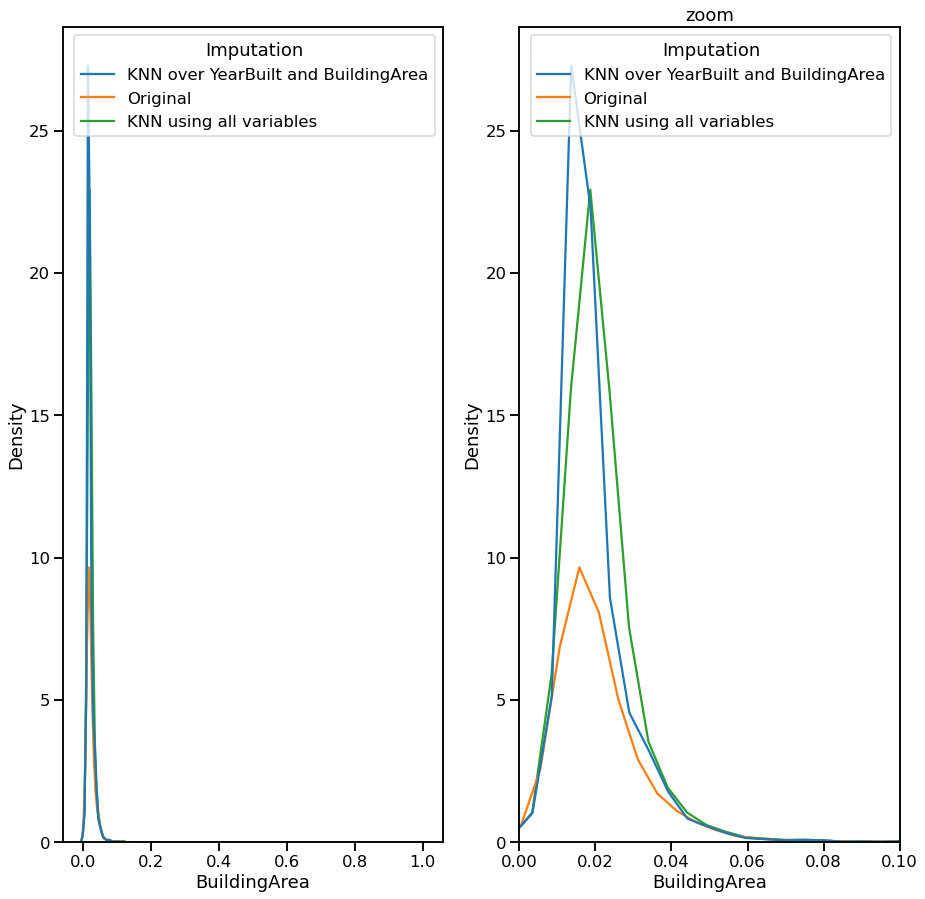

In [100]:
#Se comparan las distribuciones de las variables con distintas tecnicas de imputacion vs la original.
merged_unique_df_imputer_copy = merged_unique_df_imputer.BuildingArea.to_frame()

merged_unique_df_imputer_copy['Imputation'] = 'KNN using all variables'

mice_year_built = melb_data_mice.BuildingArea.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = merged_unique_df.BuildingArea.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
data = pandas.concat([data,merged_unique_df_imputer_copy])

fig, axes = plt.subplots(1, 2, figsize=(15, 15))


g = seaborn.kdeplot(ax=axes[0],data=data, x='BuildingArea', hue='Imputation')


g1 = seaborn.kdeplot(ax=axes[1],data=data, x='BuildingArea', hue='Imputation')
g1.set_title('zoom')
g1.set_xlim([0,0.1])

plt.show()


(0.8, 1.1)

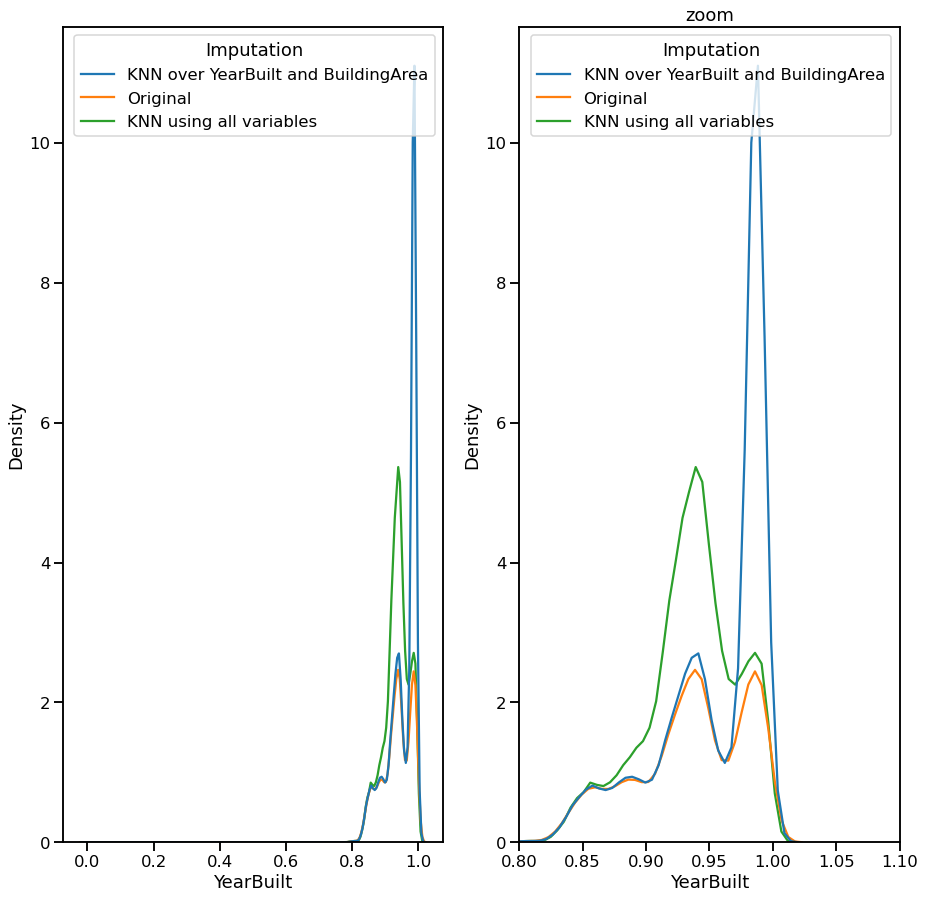

In [101]:
merged_unique_df_imputer_copy = merged_unique_df_imputer.YearBuilt.to_frame()

merged_unique_df_imputer_copy['Imputation'] = 'KNN using all variables'

mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = merged_unique_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
data = pandas.concat([data,merged_unique_df_imputer_copy])

fig, axes = plt.subplots(1, 2, figsize=(15, 15))


g = seaborn.kdeplot(ax=axes[0], data=data, x='YearBuilt', hue='Imputation')


g2 = seaborn.kdeplot(ax=axes[1],data=data, x='YearBuilt', hue='Imputation')
g2.set_title('zoom')
g2.set_xlim([0.8,1.1])


En estos graficos se puede observar que las distribuciones de las variables YearBuilt y BuildingArea imputadas utilizando todas las variables tienen dispersion mas uniforme comparado con la imputacion con una sola variable. Podemos concluir que se observa una menor variacion de sus imputaciones en el caso de utilizar una sola variable. A su vez vemos que en ambos casos se mantiene su distribucion.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [102]:
feature_cols = merged_unique_df_imputer.columns.values
feature_dict = list(merged_unique_df_imputer[feature_cols].T.to_dict().values())
feature_dict[:2]
#se crea el diccionario para utilizar en el DictVectorizer la matriz anterior con los datos ya escalados.

[{'CouncilArea_Bayside': 0.0,
  'CouncilArea_Boroondara': 0.0,
  'CouncilArea_Brimbank': 0.0,
  'CouncilArea_Casey': 0.0,
  'CouncilArea_Darebin': 0.0,
  'CouncilArea_Frankston': 0.0,
  'CouncilArea_Glen Eira': 0.0,
  'CouncilArea_Greater Dandenong': 0.0,
  'CouncilArea_Hobsons Bay': 0.0,
  'CouncilArea_Hume': 0.0,
  'CouncilArea_Kingston': 0.0,
  'CouncilArea_Knox': 0.0,
  'CouncilArea_Manningham': 0.0,
  'CouncilArea_Maribyrnong': 0.0,
  'CouncilArea_Maroondah': 0.0,
  'CouncilArea_Melbourne': 0.0,
  'CouncilArea_Melton': 0.0,
  'CouncilArea_Monash': 0.0,
  'CouncilArea_Moonee Valley': 0.0,
  'CouncilArea_Moreland': 0.0,
  'CouncilArea_Nillumbik': 0.0,
  'CouncilArea_Other': 0.0,
  'CouncilArea_Port Phillip': 0.0,
  'CouncilArea_Stonnington': 0.0,
  'CouncilArea_Whitehorse': 0.0,
  'CouncilArea_Wyndham': 0.0,
  'CouncilArea_Yarra': 1.0,
  'CouncilArea_others': 0.0,
  'Suburb_Aberfeldie': 0.0,
  'Suburb_Airport West': 0.0,
  'Suburb_Albanvale': 0.0,
  'Suburb_Albert Park': 0.0,
  'Sub

In [103]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)
#Se crea la matriz esparsa

In [104]:
feature_matrix

<13081x692 sparse matrix of type '<class 'numpy.float64'>'
	with 9052052 stored elements in Compressed Sparse Row format>

In [106]:
#evaluo la dimension final de la matriz para no generar un conflicto en la memoria
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

limit_size_mb = 10
precision_type = numpy.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
  dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
  # We calculate how many rows would fit given the number of columns
  n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
  print("Matrix too big! Using only first {} of {} rows".format(
      n_rows, feature_matrix.shape[0]))
  dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

The dense matrix will weight approximately 34.53 MB
Matrix too big! Using only first 3788 of 13081 rows
Final size: 10.00


In [107]:
if dense_feature_matrix.shape[0] < len(merged_unique_df_imputer):
  melb_df_sample = merged_unique_df_imputer.iloc[:dense_feature_matrix.shape[0]]
else:
  melb_df_sample = merged_unique_df_imputer
#se achica la matriz si se mayor a 10 Mb y si no se mantiene igual.

In [108]:
melb_df_sample
#vemos como utiliza solo 3788 filas de la matriz

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913625,0.012075
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.011633
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.022088
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.930170,0.016198
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995134,0.020910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.987835,0.010013
3784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.930900,0.027860
3785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997567,0.057723
3786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.972019,0.026653


In [109]:
scaled_dense_feature_matrix = dense_feature_matrix
#paso la matriz a densa

In [110]:
#se aplica algoritmo de analisis de componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(scaled_dense_feature_matrix)
proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape

(3788, 20)

In [111]:
pca.explained_variance_ratio_
#se busca reducir la dimensionalidad observando las componentes con mayor varianza

array([0.07634015, 0.04714344, 0.0430915 , 0.03972845, 0.03891784,
       0.03510097, 0.03091759, 0.02947185, 0.02822516, 0.02669826,
       0.02563594, 0.02527611, 0.0214563 , 0.02094511, 0.02075682,
       0.01836896, 0.01788835, 0.01665882, 0.0165598 , 0.01592013],
      dtype=float32)

Text(0.5, 0, 'Components')

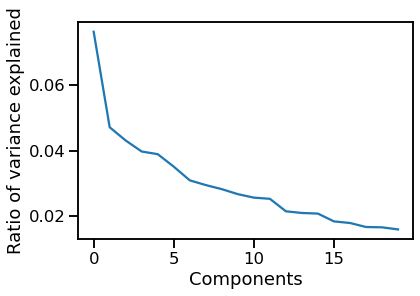

In [113]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
#observamos que luego de la quinta componente la descripcion de la varianza es poco descriptiva (cercana a 0).

In [112]:
pca.explained_variance_ratio_[0:5].sum()

0.24522136

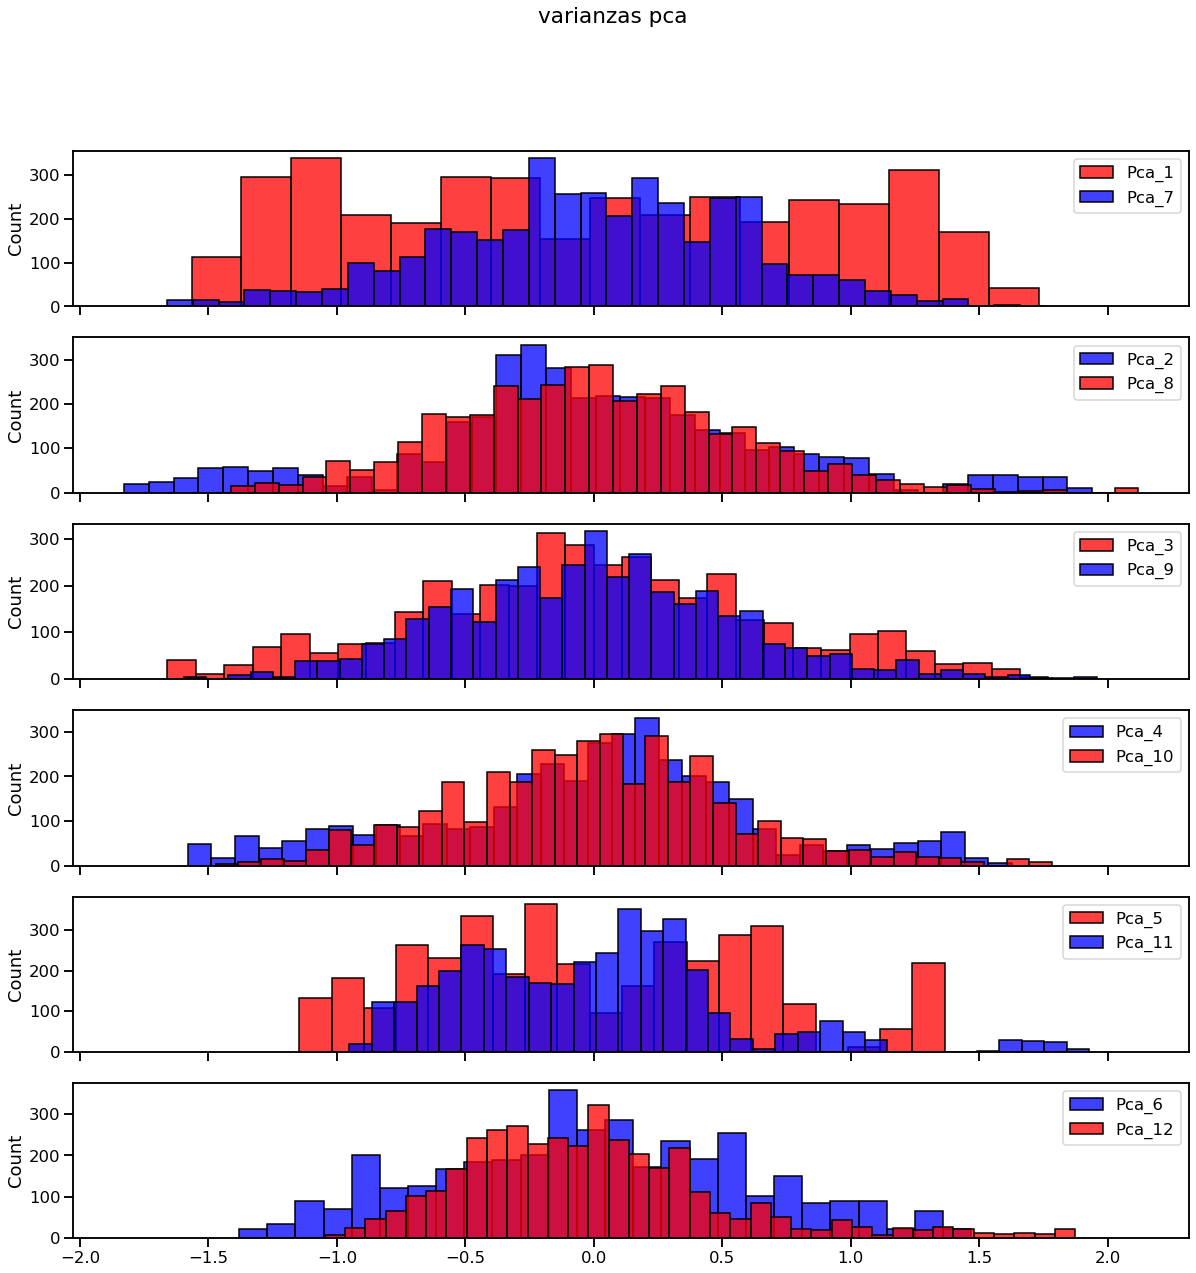

In [122]:
#se grafican las proyecciones de las 12 componentes principales para observar la disminucion de la varianza.
#se realiza superponiendo una componente vs el valor de la sexta componente siguiente.
fig, axes = plt.subplots(6, figsize=(20, 20),sharex=True)
fig.suptitle('varianzas pca')
color1='red'
color2='blue'
seaborn.histplot(ax=axes[0], x=proyected_features[:,0], color=color1, label='Pca_1')
seaborn.histplot(ax=axes[1], x=proyected_features[:,1], color=color2,label='Pca_2')
seaborn.histplot(ax=axes[2], x=proyected_features[:,2], color=color1, label='Pca_3')
seaborn.histplot(ax=axes[3], x=proyected_features[:,3], color=color2, label='Pca_4')
seaborn.histplot(ax=axes[4], x=proyected_features[:,4], color=color1, label='Pca_5')
seaborn.histplot(ax=axes[5], x=proyected_features[:,5], color=color2, label='Pca_6')
seaborn.histplot(ax=axes[0], x=proyected_features[:,6], color=color2, label='Pca_7')
seaborn.histplot(ax=axes[1], x=proyected_features[:,7], color=color1, label='Pca_8')
seaborn.histplot(ax=axes[2], x=proyected_features[:,8], color=color2, label='Pca_9')
seaborn.histplot(ax=axes[3], x=proyected_features[:,9], color=color1, label='Pca_10')
seaborn.histplot(ax=axes[4], x=proyected_features[:,10], color=color2, label='Pca_11')
seaborn.histplot(ax=axes[5], x=proyected_features[:,11], color=color1, label='Pca_12')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()
axes[5].legend()

Se puede observar como las varianzas disminuyen a medida que aumentan las Pca.
Decidimos obtener solo las 5 primeras componentes principales debido a que creemos que aportan la mayor informacion de la varianza.

In [115]:
melb_df_sample[['Pca_1', 'Pca_2','Pca_3', 'Pca_4','Pca_5']] = proyected_features[:,:5]

/home/ariel/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-115-c002a13f9469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df_sample[['Pca_1', 'Pca_2','Pca_3', 'Pca_4','Pca_5']] = proyected_features[:,:5]
/home/ariel/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

<AxesSubplot:xlabel='Pca_1', ylabel='Pca_2'>

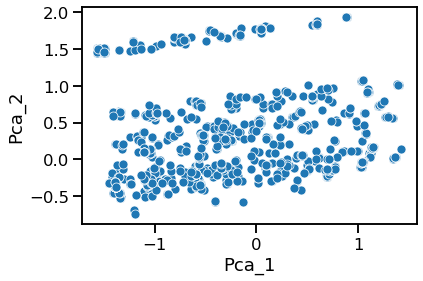

In [116]:

data = melb_df_sample[cols + ['Pca_1', 'Pca_2']][:1000].dropna(how='any')
seaborn.scatterplot(data=data, x='Pca_1', y='Pca_2')
                     


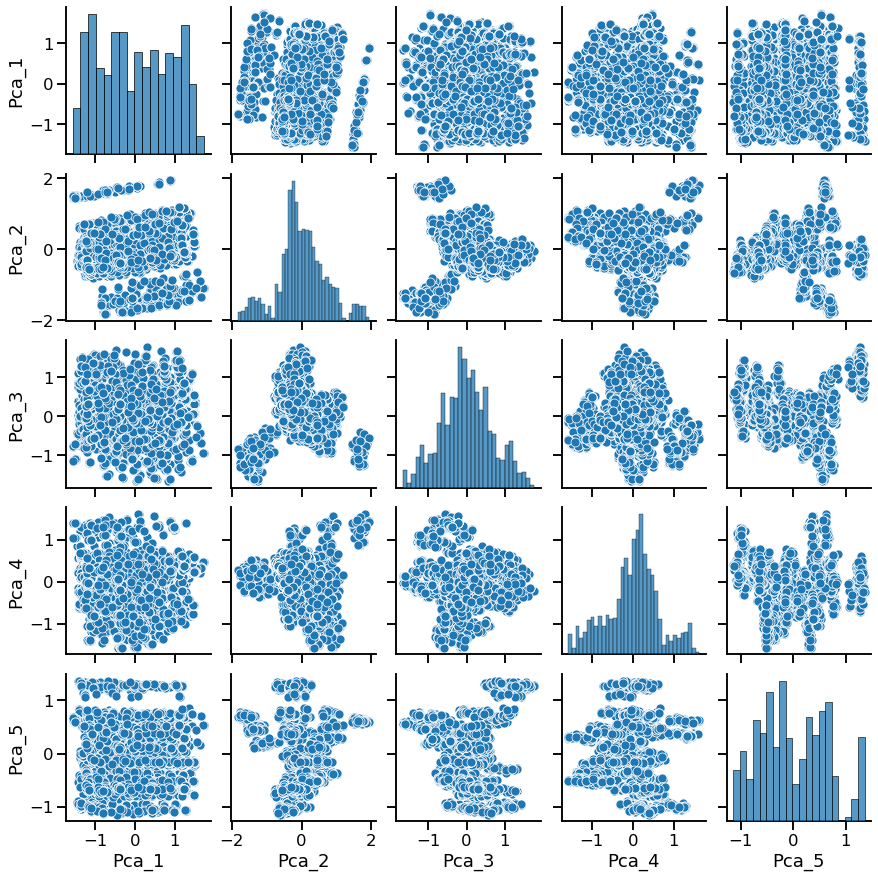

In [117]:
seaborn.pairplot(data=melb_df_sample,
                x_vars=['Pca_1', 'Pca_2','Pca_3', 'Pca_4','Pca_5'],
                y_vars=['Pca_1', 'Pca_2','Pca_3', 'Pca_4','Pca_5'])
#se realizan graficos entre las componentes

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

Ya esta dispuesto con los nombres originales de la matriz.

In [120]:
melb_df_sample.to_csv('Dataframe_melb_pca.csv',index=False)

In [121]:
new_df=pandas.read_csv("Dataframe_melb_pca.csv")
new_df

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea,Pca_1,Pca_2,Pca_3,Pca_4,Pca_5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.913625,0.012075,1.108105,0.034516,0.229519,0.114159,-0.220189
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.856448,0.011633,0.775938,-0.100751,0.257025,0.047551,-0.226382
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.856448,0.022088,-0.569879,-0.272257,-0.194836,-0.166303,-0.190737
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.930170,0.016198,-0.210638,-0.141725,-0.257132,-0.100902,-0.180269
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.995134,0.020910,-0.177016,-0.228109,0.251535,0.018063,-0.247308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.987835,0.010013,-0.890966,0.429220,-0.229739,-0.538229,-0.162035
3784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.930900,0.027860,1.330041,0.877116,-0.009398,-0.399397,-0.163546
3785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.997567,0.057723,-1.105418,0.446976,-0.595573,-0.802659,-0.084455
3786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.972019,0.026653,-1.037805,0.452546,-0.562576,-0.812928,-0.116160


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles (casa, monoambiente, duplex)
  3. CouncilArea: Area municipal. 33 valores posibles
  4. Suburb: Barrio. 314 valores posibles

  
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando un agrupamiento para obtener un 
  minimo de valores frecuentes que varia segun la variable.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].
  4.Price: Precio de la propiedad en dolares
  5.Zipcode: codigo postal
  6.Car: Cantidad de cocheras.
  7.airbnb_count_price: Se agrega la cantidad de valores de precios iguales en el mismo codigopostal
     utilizando publicaciones de la plataforma AirBnB [Link al repositorio con datos externos].
  8. Bathroom: cantidad de baños
  9. Building Area : dimension de area construida
  10.Yearbuilt: Año construido.
  11.Property Count: cantidad de propiedades que existen en el suburbio.
  
  ### Transformaciones:
  1. Todas las características numéricas fueron escaladas.
  2. La columna `CouncilArea` fue imputada utilizando el método k vecinos mas cercanos, en funcion de la variable 'Suburb'
  3. Las columnas `YearBuilt` y 'BuildingArea' fueron imputadas utilizando el 
     algoritmo k vecinos mas cercanos pero con todas las variables del df.
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```